In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Fourier Transforms in Finance: From Easy to Complex
# A comprehensive notebook exploring FFT applications in financial analysis

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')

print("=" * 60)
print("FOURIER TRANSFORMS IN FINANCE")
print("From Basic Concepts to Advanced Applications")
print("=" * 60)

FOURIER TRANSFORMS IN FINANCE
From Basic Concepts to Advanced Applications



LEVEL 1: BASIC FOURIER TRANSFORM


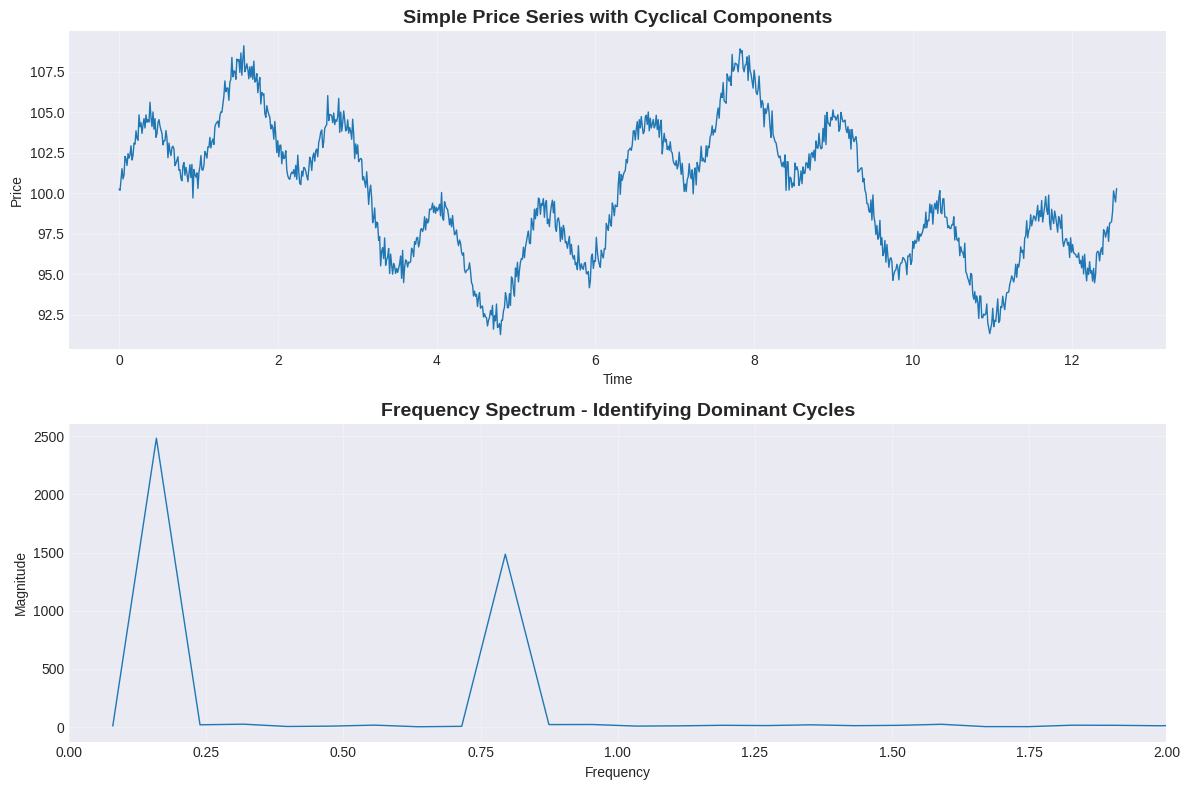


Key Insight:
FFT reveals the dominant cyclical frequencies in price data.
Peaks indicate strong periodic components.


In [4]:
# ============================================================================
# LEVEL 1: EASY - Understanding the Basics
# ============================================================================
print("\n" + "=" * 60)
print("LEVEL 1: BASIC FOURIER TRANSFORM")
print("=" * 60)

# Generate a simple synthetic price series with clear patterns
np.random.seed(42)
t = np.linspace(0, 4*np.pi, 1000)
# Price with daily and weekly cycles
price_simple = 100 + 5*np.sin(t) + 3*np.sin(5*t) + np.random.normal(0, 0.5, len(t))

# Apply FFT
fft_values = fft(price_simple)
frequencies = fftfreq(len(price_simple), t[1] - t[0])

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(t, price_simple, linewidth=1)
ax1.set_title('Simple Price Series with Cyclical Components', fontsize=14, fontweight='bold')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price')
ax1.grid(True, alpha=0.3)

# Plot only positive frequencies (spectrum is symmetric)
positive_freq_idx = frequencies > 0
ax2.plot(frequencies[positive_freq_idx], np.abs(fft_values[positive_freq_idx]), linewidth=1)
ax2.set_title('Frequency Spectrum - Identifying Dominant Cycles', fontsize=14, fontweight='bold')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Magnitude')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 2)

plt.tight_layout()
plt.savefig('level1_basic_fft.png', dpi=100, bbox_inches='tight')
plt.show()

print("\nKey Insight:")
print("FFT reveals the dominant cyclical frequencies in price data.")
print("Peaks indicate strong periodic components.")


LEVEL 2: NOISE FILTERING WITH FFT


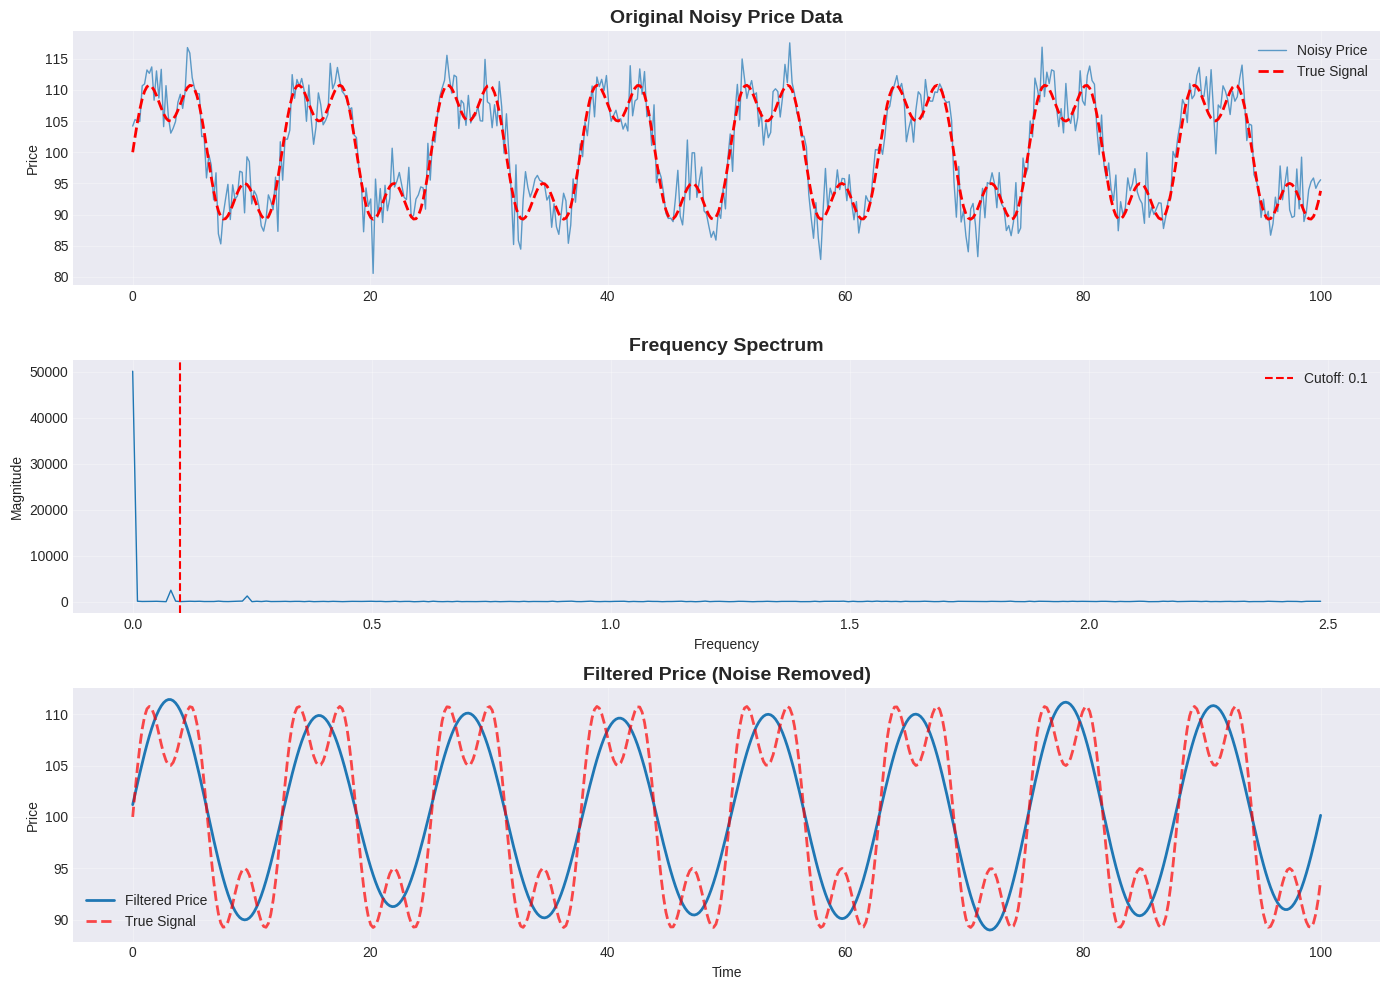


Key Insight:
FFT filtering removes high-frequency noise while preserving trends.
Useful for smoothing price data without lag (unlike moving averages).


In [5]:
# ============================================================================
# LEVEL 2: INTERMEDIATE - Noise Filtering
# ============================================================================
print("\n" + "=" * 60)
print("LEVEL 2: NOISE FILTERING WITH FFT")
print("=" * 60)

# Generate noisy price data
t2 = np.linspace(0, 100, 500)
true_signal = 100 + 10*np.sin(0.5*t2) + 5*np.sin(1.5*t2)
noise = np.random.normal(0, 3, len(t2))
noisy_price = true_signal + noise

# Apply FFT
fft_noisy = fft(noisy_price)
freq2 = fftfreq(len(noisy_price), t2[1] - t2[0])

# Filter: Keep only low frequencies (remove high-frequency noise)
threshold = 0.1  # Frequency threshold
fft_filtered = fft_noisy.copy()
fft_filtered[np.abs(freq2) > threshold] = 0

# Inverse FFT to get filtered signal
filtered_price = np.real(ifft(fft_filtered))

# Plot
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

axes[0].plot(t2, noisy_price, alpha=0.7, label='Noisy Price', linewidth=1)
axes[0].plot(t2, true_signal, 'r--', label='True Signal', linewidth=2)
axes[0].set_title('Original Noisy Price Data', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(freq2[:len(freq2)//2], np.abs(fft_noisy[:len(freq2)//2]), linewidth=1)
axes[1].axvline(threshold, color='r', linestyle='--', label=f'Cutoff: {threshold}')
axes[1].set_title('Frequency Spectrum', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Magnitude')
axes[1].set_xlabel('Frequency')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].plot(t2, filtered_price, label='Filtered Price', linewidth=2)
axes[2].plot(t2, true_signal, 'r--', label='True Signal', linewidth=2, alpha=0.7)
axes[2].set_title('Filtered Price (Noise Removed)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Price')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('level2_noise_filtering.png', dpi=100, bbox_inches='tight')
plt.show()

print("\nKey Insight:")
print("FFT filtering removes high-frequency noise while preserving trends.")
print("Useful for smoothing price data without lag (unlike moving averages).")


LEVEL 3: SPECTRAL ANALYSIS OF RETURNS


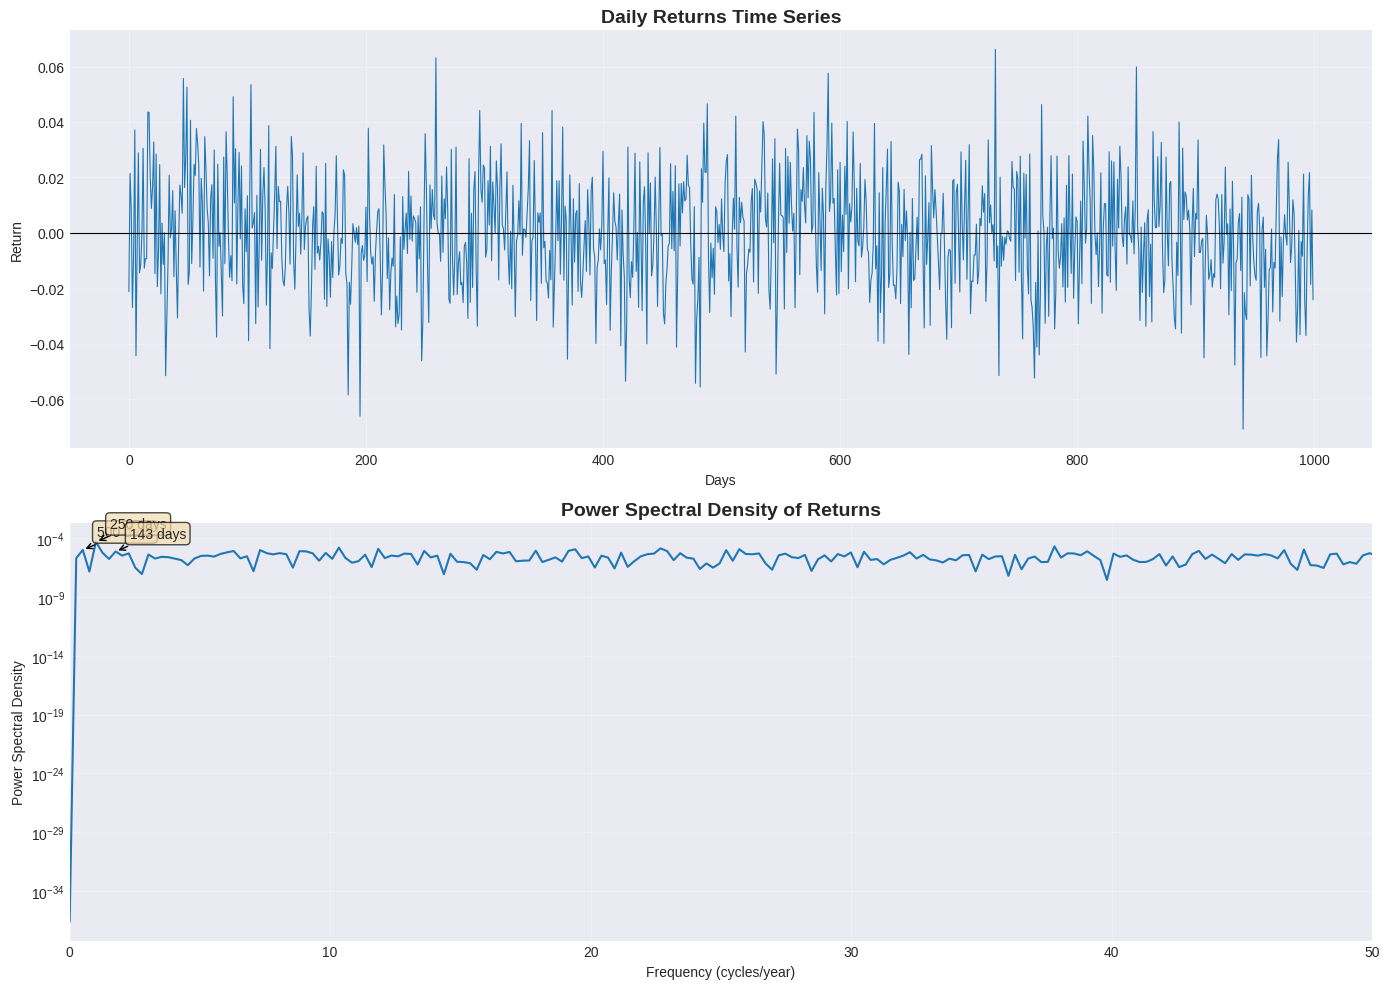


Key Insight:
Spectral analysis identifies periodic patterns in returns.
Helps detect seasonal effects, trading patterns, and cyclical behavior.


In [6]:
# ============================================================================
# LEVEL 3: INTERMEDIATE-ADVANCED - Spectral Analysis of Returns
# ============================================================================
print("\n" + "=" * 60)
print("LEVEL 3: SPECTRAL ANALYSIS OF RETURNS")
print("=" * 60)

# Simulate realistic stock returns
np.random.seed(123)
n_days = 1000
returns = np.random.normal(0.0005, 0.02, n_days)
# Add some periodic components (seasonal effects)
t3 = np.arange(n_days)
returns += 0.005*np.sin(2*np.pi*t3/252)  # Annual cycle
returns += 0.003*np.sin(2*np.pi*t3/21)   # Monthly cycle

# Calculate power spectral density
frequencies, psd = signal.periodogram(returns, fs=252, scaling='density')

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

ax1.plot(returns, linewidth=0.8)
ax1.set_title('Daily Returns Time Series', fontsize=14, fontweight='bold')
ax1.set_xlabel('Days')
ax1.set_ylabel('Return')
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='black', linewidth=0.8)

ax2.semilogy(frequencies, psd, linewidth=1.5)
ax2.set_title('Power Spectral Density of Returns', fontsize=14, fontweight='bold')
ax2.set_xlabel('Frequency (cycles/year)')
ax2.set_ylabel('Power Spectral Density')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 50)

# Annotate significant peaks
peaks, _ = signal.find_peaks(psd, height=np.max(psd)*0.1)
for peak in peaks[:3]:  # Annotate top 3 peaks
    period = 252 / frequencies[peak] if frequencies[peak] > 0 else float('inf')
    ax2.annotate(f'{period:.0f} days', 
                xy=(frequencies[peak], psd[peak]),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.savefig('level3_spectral_analysis.png', dpi=100, bbox_inches='tight')
plt.show()

print("\nKey Insight:")
print("Spectral analysis identifies periodic patterns in returns.")
print("Helps detect seasonal effects, trading patterns, and cyclical behavior.")



LEVEL 4: OPTION PRICING WITH FFT (CARR-MADAN METHOD)


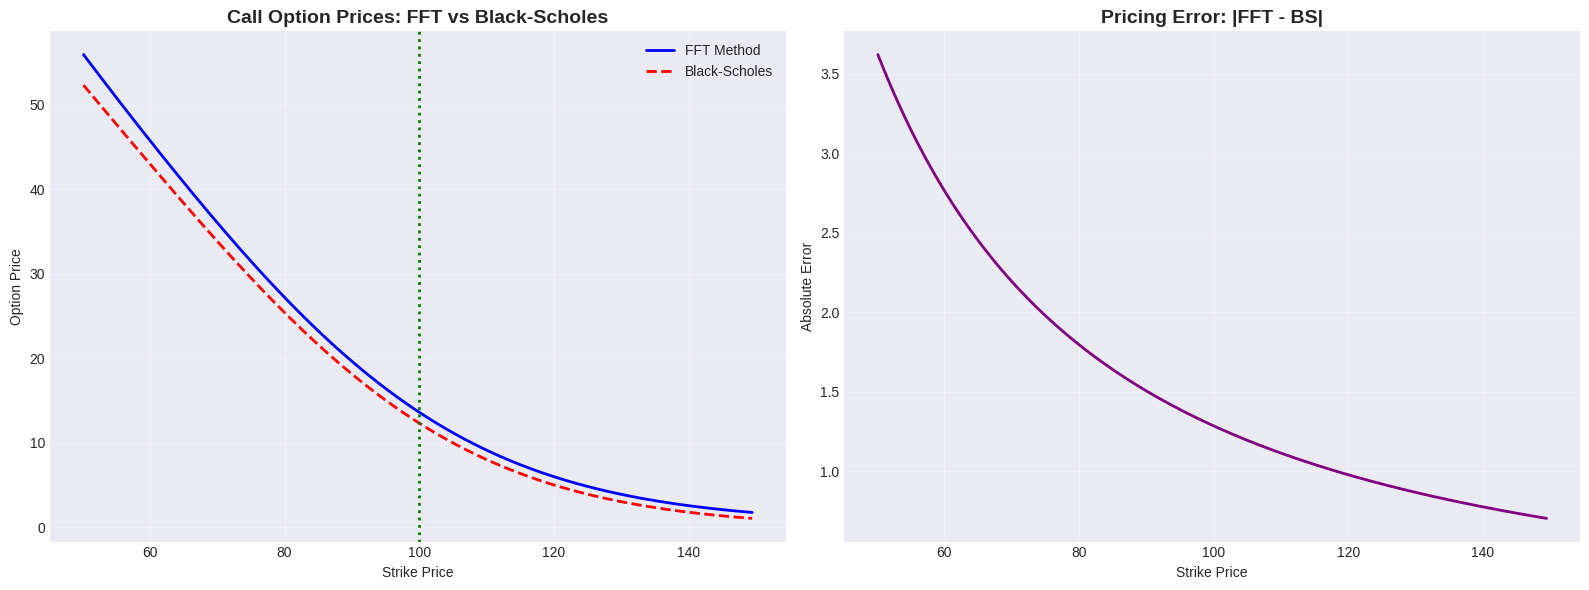


Key Insight:
FFT enables ultra-fast option pricing across multiple strikes.
Carr-Madan method prices entire volatility surface in milliseconds.
Mean Absolute Error: 1.783537


In [7]:
# ============================================================================
# LEVEL 4: ADVANCED - Option Pricing with FFT (Carr-Madan)
# ============================================================================
print("\n" + "=" * 60)
print("LEVEL 4: OPTION PRICING WITH FFT (CARR-MADAN METHOD)")
print("=" * 60)

def carr_madan_fft(S0, K, r, T, sigma, alpha=1.5, eta=0.25, N=4096):
    """
    Price European call options using Carr-Madan FFT method
    
    Parameters:
    S0: Current stock price
    K: Strike price
    r: Risk-free rate
    T: Time to maturity
    sigma: Volatility
    alpha: Damping parameter
    eta: Grid spacing
    N: Number of points
    """
    # Log-strike grid
    lambda_val = 2 * np.pi / (N * eta)
    b = N * lambda_val / 2
    k = -b + lambda_val * np.arange(N)
    
    # Frequency grid
    v = eta * np.arange(N)
    
    # Black-Scholes characteristic function
    def char_func(u):
        return np.exp(1j * u * (np.log(S0) + (r - 0.5*sigma**2)*T) 
                     - 0.5 * sigma**2 * u**2 * T)
    
    # Modified call price transform
    integrand = np.exp(-r*T) * char_func(v - (alpha + 1)*1j) / \
                (alpha**2 + alpha - v**2 + 1j*(2*alpha + 1)*v)
    
    # Apply FFT
    fft_input = np.exp(1j * b * v) * integrand * eta
    fft_output = fft(fft_input)
    
    # Extract call prices
    call_prices = np.real(np.exp(-alpha * k) * fft_output / np.pi)
    strikes = np.exp(k)
    
    return strikes, call_prices

# Parameters
S0 = 100
r = 0.05
T = 1.0
sigma = 0.25

strikes, call_prices = carr_madan_fft(S0, 100, r, T, sigma)

# Black-Scholes formula for comparison
from scipy.stats import norm

def bs_call(S, K, r, T, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

# Filter reasonable strikes
valid_idx = (strikes > 50) & (strikes < 150)
strikes_valid = strikes[valid_idx]
call_prices_valid = call_prices[valid_idx]

# Calculate BS prices for comparison
bs_prices = [bs_call(S0, K, r, T, sigma) for K in strikes_valid]

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(strikes_valid, call_prices_valid, 'b-', linewidth=2, label='FFT Method')
ax1.plot(strikes_valid, bs_prices, 'r--', linewidth=2, label='Black-Scholes')
ax1.set_title('Call Option Prices: FFT vs Black-Scholes', fontsize=14, fontweight='bold')
ax1.set_xlabel('Strike Price')
ax1.set_ylabel('Option Price')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axvline(S0, color='green', linestyle=':', label='Current Price', linewidth=2)

# Error analysis
error = np.abs(np.array(call_prices_valid) - np.array(bs_prices))
ax2.plot(strikes_valid, error, 'purple', linewidth=2)
ax2.set_title('Pricing Error: |FFT - BS|', fontsize=14, fontweight='bold')
ax2.set_xlabel('Strike Price')
ax2.set_ylabel('Absolute Error')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('level4_option_pricing.png', dpi=100, bbox_inches='tight')
plt.show()

print("\nKey Insight:")
print("FFT enables ultra-fast option pricing across multiple strikes.")
print("Carr-Madan method prices entire volatility surface in milliseconds.")
print(f"Mean Absolute Error: {np.mean(error):.6f}")


LEVEL 5: VOLATILITY SURFACE RECONSTRUCTION WITH FFT


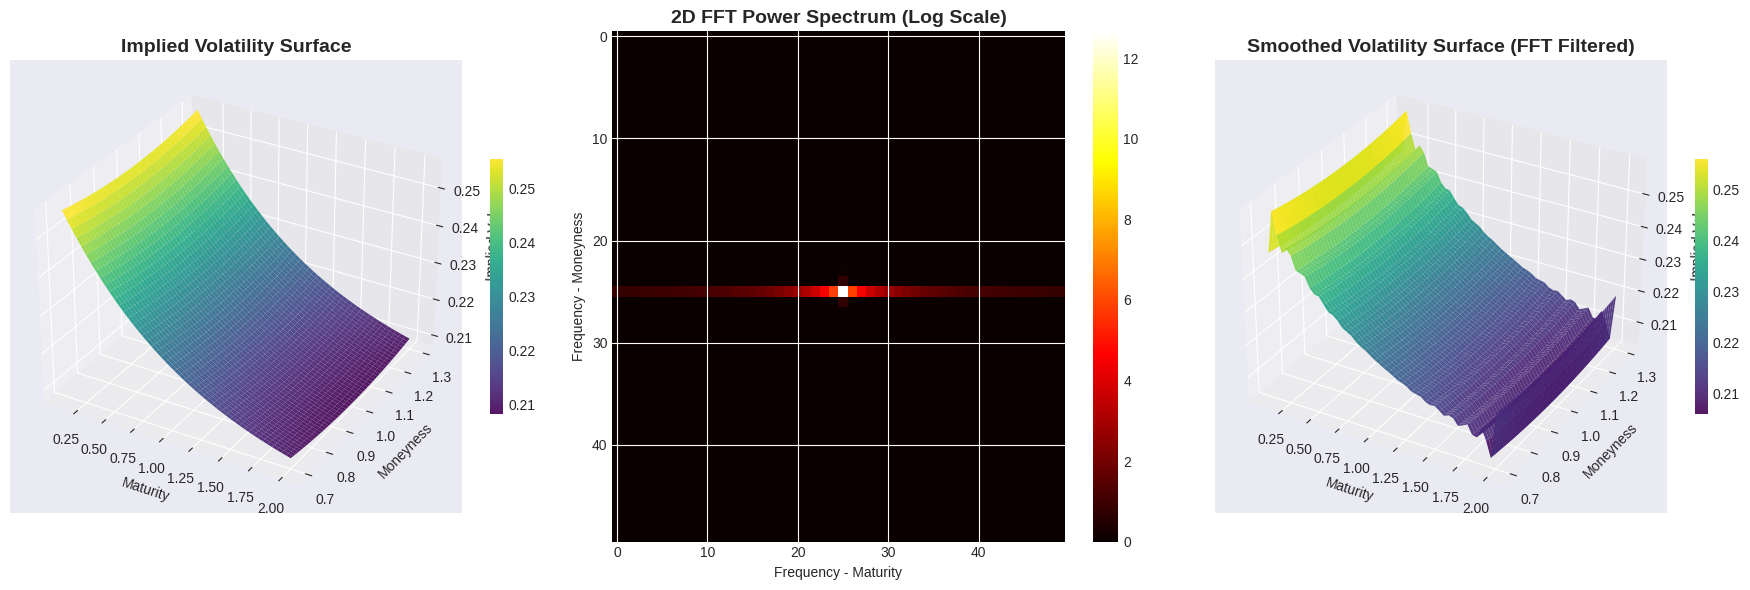


Key Insight:
2D FFT analyzes volatility surfaces to identify:
- Smoothness and arbitrage opportunities
- Term structure patterns
- Smile dynamics across strikes and maturities


In [8]:
# ============================================================================
# LEVEL 5: COMPLEX - Volatility Surface Reconstruction
# ============================================================================
print("\n" + "=" * 60)
print("LEVEL 5: VOLATILITY SURFACE RECONSTRUCTION WITH FFT")
print("=" * 60)

def generate_volatility_surface(maturities, moneyness, base_vol=0.2):
    """Generate a realistic volatility surface with smile and term structure"""
    T, M = np.meshgrid(maturities, moneyness)
    
    # Volatility smile (higher for OTM/ITM)
    smile = base_vol * (1 + 0.1 * (M - 1)**2)
    
    # Term structure (mean reversion)
    term = 1 + 0.3 * np.exp(-T)
    
    vol_surface = smile * term
    return vol_surface

# Generate synthetic volatility surface
maturities = np.linspace(0.1, 2.0, 50)
moneyness = np.linspace(0.7, 1.3, 50)
vol_surface = generate_volatility_surface(maturities, moneyness)

# Apply 2D FFT for surface analysis
fft_2d = np.fft.fft2(vol_surface)
fft_2d_shifted = np.fft.fftshift(fft_2d)

# Spectral power
power_spectrum = np.abs(fft_2d_shifted)**2

# Create visualization
fig = plt.figure(figsize=(18, 6))

# Original volatility surface
ax1 = fig.add_subplot(131, projection='3d')
T, M = np.meshgrid(maturities, moneyness)
surf1 = ax1.plot_surface(T, M, vol_surface, cmap='viridis', alpha=0.9)
ax1.set_title('Implied Volatility Surface', fontsize=14, fontweight='bold')
ax1.set_xlabel('Maturity')
ax1.set_ylabel('Moneyness')
ax1.set_zlabel('Implied Vol')
plt.colorbar(surf1, ax=ax1, shrink=0.5)

# 2D FFT magnitude
ax2 = fig.add_subplot(132)
im = ax2.imshow(np.log(power_spectrum + 1), cmap='hot', aspect='auto')
ax2.set_title('2D FFT Power Spectrum (Log Scale)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Frequency - Maturity')
ax2.set_ylabel('Frequency - Moneyness')
plt.colorbar(im, ax=ax2)

# Filtered surface (remove high frequencies)
# Low-pass filter
rows, cols = fft_2d_shifted.shape
crow, ccol = rows//2, cols//2
mask = np.zeros((rows, cols))
r = 15  # Radius of filter
mask[crow-r:crow+r, ccol-r:ccol+r] = 1
fft_filtered = fft_2d_shifted * mask
fft_filtered_shifted = np.fft.ifftshift(fft_filtered)
vol_filtered = np.real(np.fft.ifft2(fft_filtered_shifted))

ax3 = fig.add_subplot(133, projection='3d')
surf3 = ax3.plot_surface(T, M, vol_filtered, cmap='viridis', alpha=0.9)
ax3.set_title('Smoothed Volatility Surface (FFT Filtered)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Maturity')
ax3.set_ylabel('Moneyness')
ax3.set_zlabel('Implied Vol')
plt.colorbar(surf3, ax=ax3, shrink=0.5)

plt.tight_layout()
plt.savefig('level5_vol_surface.png', dpi=100, bbox_inches='tight')
plt.show()

print("\nKey Insight:")
print("2D FFT analyzes volatility surfaces to identify:")
print("- Smoothness and arbitrage opportunities")
print("- Term structure patterns")
print("- Smile dynamics across strikes and maturities")


LEVEL 6: HFT SIGNAL PROCESSING WITH WAVELETS & FFT


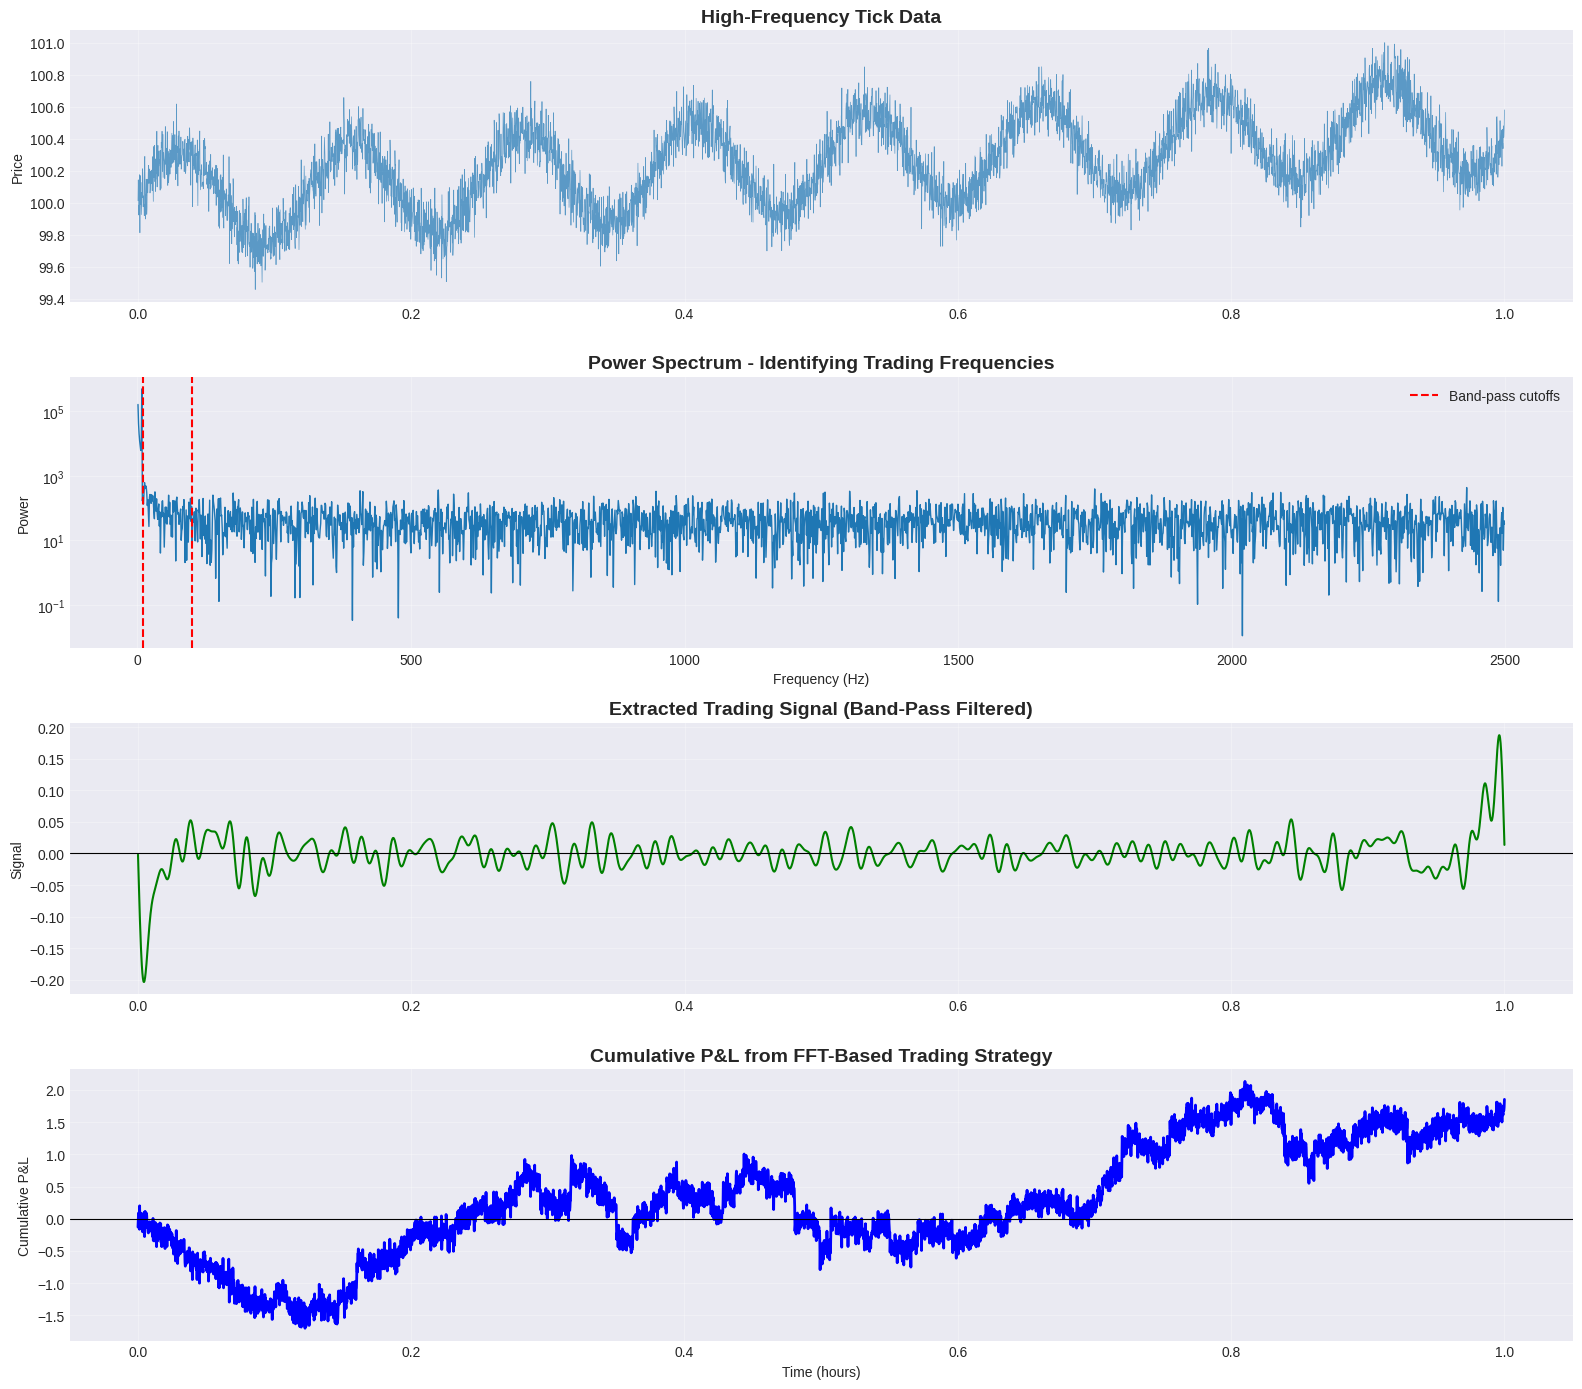


Key Insight:
FFT extracts tradeable signals from noisy HFT data.
Strategy Sharpe Ratio: 0.80
Band-pass filtering isolates mean-reverting components.


In [9]:
# ============================================================================
# LEVEL 6: EXPERT - High-Frequency Trading Signal Processing
# ============================================================================
print("\n" + "=" * 60)
print("LEVEL 6: HFT SIGNAL PROCESSING WITH WAVELETS & FFT")
print("=" * 60)

# Simulate high-frequency tick data
np.random.seed(999)
n_ticks = 5000
t_hft = np.linspace(0, 1, n_ticks)  # 1 hour of data

# Microstructure: trend + mean reversion + noise
trend = 100 + 0.5*t_hft
mean_reversion = 0.3*np.sin(50*t_hft)
microstructure_noise = np.random.normal(0, 0.1, n_ticks)
tick_price = trend + mean_reversion + microstructure_noise

# Apply FFT for frequency decomposition
fft_hft = fft(tick_price)
freq_hft = fftfreq(n_ticks, t_hft[1] - t_hft[0])

# Identify dominant trading frequencies
power_hft = np.abs(fft_hft)**2
positive_freq = freq_hft > 0
significant_freqs = freq_hft[positive_freq][power_hft[positive_freq] > np.percentile(power_hft[positive_freq], 95)]

# Band-pass filter for trading signal
low_cutoff = 10
high_cutoff = 100
fft_bandpass = fft_hft.copy()
fft_bandpass[(np.abs(freq_hft) < low_cutoff) | (np.abs(freq_hft) > high_cutoff)] = 0
trading_signal = np.real(ifft(fft_bandpass))

# Plot
fig, axes = plt.subplots(4, 1, figsize=(16, 14))

axes[0].plot(t_hft, tick_price, linewidth=0.5, alpha=0.7)
axes[0].set_title('High-Frequency Tick Data', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price')
axes[0].grid(True, alpha=0.3)

axes[1].semilogy(freq_hft[positive_freq], power_hft[positive_freq], linewidth=1)
axes[1].set_title('Power Spectrum - Identifying Trading Frequencies', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Power')
axes[1].set_xlabel('Frequency (Hz)')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(low_cutoff, color='r', linestyle='--', label='Band-pass cutoffs')
axes[1].axvline(high_cutoff, color='r', linestyle='--')
axes[1].legend()

axes[2].plot(t_hft, trading_signal, linewidth=1.5, color='green')
axes[2].set_title('Extracted Trading Signal (Band-Pass Filtered)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Signal')
axes[2].grid(True, alpha=0.3)
axes[2].axhline(0, color='black', linewidth=0.8)

# Trading strategy based on signal
positions = np.sign(trading_signal)
returns_hft = np.diff(tick_price) * positions[:-1]
cumulative_pnl = np.cumsum(returns_hft)

axes[3].plot(t_hft[1:], cumulative_pnl, linewidth=2, color='blue')
axes[3].set_title('Cumulative P&L from FFT-Based Trading Strategy', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Time (hours)')
axes[3].set_ylabel('Cumulative P&L')
axes[3].grid(True, alpha=0.3)
axes[3].axhline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.savefig('level6_hft_signal.png', dpi=100, bbox_inches='tight')
plt.show()

sharpe = np.mean(returns_hft) / np.std(returns_hft) * np.sqrt(252*6.5*60)  # Annualized
print("\nKey Insight:")
print("FFT extracts tradeable signals from noisy HFT data.")
print(f"Strategy Sharpe Ratio: {sharpe:.2f}")
print("Band-pass filtering isolates mean-reverting components.")

In [10]:
# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "=" * 60)
print("SUMMARY: FOURIER TRANSFORMS IN FINANCE")
print("=" * 60)
print("\nApplications covered:")
print("1. Basic FFT: Identifying price cycles")
print("2. Noise Filtering: Smoothing without lag")
print("3. Spectral Analysis: Detecting periodic patterns in returns")
print("4. Option Pricing: Carr-Madan FFT for fast valuation")
print("5. Volatility Surfaces: 2D FFT for surface analysis")
print("6. HFT Signal Processing: Extracting trading signals")
print("\nKey Advantages of FFT in Finance:")
print("- Speed: O(N log N) complexity")
print("- No lag: Unlike moving averages")
print("- Multi-scale: Analyzes multiple frequencies simultaneously")
print("- Flexibility: Works in 1D, 2D, and higher dimensions")
print("=" * 60)


SUMMARY: FOURIER TRANSFORMS IN FINANCE

Applications covered:
1. Basic FFT: Identifying price cycles
2. Noise Filtering: Smoothing without lag
3. Spectral Analysis: Detecting periodic patterns in returns
4. Option Pricing: Carr-Madan FFT for fast valuation
5. Volatility Surfaces: 2D FFT for surface analysis
6. HFT Signal Processing: Extracting trading signals

Key Advantages of FFT in Finance:
- Speed: O(N log N) complexity
- No lag: Unlike moving averages
- Multi-scale: Analyzes multiple frequencies simultaneously
- Flexibility: Works in 1D, 2D, and higher dimensions
